In [1]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
stage='noratiocutsingleshower'

#f = '/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/backgrounds_obnoxious.root'
f = '/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/MCBNBCos/backgrounds_obnoxious_singleshower.root'
on ='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OnBeam/backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_2/AnaFiles/OffBeam/backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)


stage = 'OBNOX'

In [3]:
print df0.shape, df1.shape, df.shape


(553, 27) (43, 27) (2574, 25)


In [4]:
oth_v = df.query('bkgd_id == 0')
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12')
ncoth_v = df.query('bkgd_id == 13')

colors_tst = ['grey','mediumpurple','lime','magenta','tan','blue','purple','red','orange','yellow',\
              'khaki','lightskyblue','green','salmon'] #magenta','tan']
labels_tst = ['Cosmic (Data)','No MCT Match','NC $\pi^0$','CC 1-$\pi^0$ OutFV','Mult $\pi^0$',\
              '$\\nu_e$','anti $\\nu_{\mu}$','CC Cex','NC Cex','N-$\gamma$','K+- -> $\pi^0$', 'CC Other','NC Other','Signal']

In [5]:
print cos_v.shape[0], cc1pi0_v.shape[0]

print len(colors_tst), len(labels_tst)

15 1050
14 14


In [6]:
tot_on = 543584 #541554 #525613
tot_off = 301061 #218466 #379202
tot_bnbcos = 232250 #384200 #101600

scale_intime = 10.279 
int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 567157 #547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'mu_startx'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
cc1pi0_outFV_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_outFV_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
nue_w = [ mc_to_onbeam for i in xrange(len(nue_v[var].values)) ] 
antinumu_w = [ mc_to_onbeam for i in xrange(len(antinumu_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nccex_w = [ mc_to_onbeam for i in xrange(len(nccex_v[var].values)) ] 
ccgamma_w = [ mc_to_onbeam for i in xrange(len(ccgamma_v[var].values)) ] 
kaon_w = [ mc_to_onbeam for i in xrange(len(kaon_v[var].values)) ] 
ccoth_w = [ mc_to_onbeam for i in xrange(len(ccoth_v[var].values)) ] 
ncoth_w = [ mc_to_onbeam for i in xrange(len(ncoth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 


#weights= []
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 
#print len(weights)

POTS :  0.474426093657 2.34512577346
MC to OnBeam :  0.202303048743
Off to OnBeam:  1.56893960342


In [7]:
tot = len(all_w) * mc_to_onbeam + len(cos_ext_w) * off_to_on
print tot

588.192450411


In [8]:
print '\nSignal : ', len(sig_w) * mc_to_onbeam /tot

print '\nBackgorunds (CC 0 pi0): '
print ' CC Cex : ', len(cccex_w)*mc_to_onbeam / tot
print ' CC gamma : ', len(ccgamma_w)*mc_to_onbeam  / tot
print ' Kaon : ', len(kaon_w)*mc_to_onbeam / tot
print ' CCOther : ', len(ccoth_w) * mc_to_onbeam / tot

print '\nBackgorunds (NC >=1 pi0): '
print ' NC 1pi0 : ', len(nc1pi0_w)*mc_to_onbeam / tot

print '\nBackgorunds (NC 0 pi0): '
print ' NC Cex : ', len(nccex_w)*mc_to_onbeam / tot
print ' NCOther : ', len(ncoth_w)*mc_to_onbeam / tot

print '\nBackgorunds (Other): '
print ' CC 1pi0 out FV : ', len(cc1pi0_outFV_w)*mc_to_onbeam / tot
print ' Multiple pi0 : ', len(multpi0_w)*mc_to_onbeam / tot
print ' Nue : ', len(nue_w)*mc_to_onbeam / tot
print ' Antinumu : ', len(antinumu_w)*mc_to_onbeam / tot

print '\nBackgorunds (Cosmics): '
print ' No MCT Match : ', len(oth_w) *mc_to_onbeam  / tot
print ' Cosmic (Data) : ', len(cos_ext_w) * off_to_on / tot



Signal :  0.361137245185

Backgorunds (CC 0 pi0): 
 CC Cex :  0.0240758163456
 CC gamma :  0.0123818484063
 Kaon :  0.00206364140106
 CCOther :  0.214274765476

Backgorunds (NC >=1 pi0): 
 NC 1pi0 :  0.0973350860831

Backgorunds (NC 0 pi0): 
 NC Cex :  0.00619092420317
 NCOther :  0.018916712843

Backgorunds (Other): 
 CC 1pi0 out FV :  0.0233879358786
 Multiple pi0 :  0.0302667405488
 Nue :  0.0123818484063
 Antinumu :  0.00550304373615

Backgorunds (Cosmics): 
 No MCT Match :  0.0722274490369
 Cosmic (Data) :  0.114697838947


In [10]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_mc = np.sqrt(bnbcos_m)
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    colors_tst = ['grey','yellow','purple','mediumpurple','orchid','magenta','lime','green','olive','skyblue','blue',\
                'lightskyblue','darkblue', 'salmon'] 
    labels_tst = ['Cosmic (Data)','No MCT Match','CC 1-$\pi^0$ OutFV','Mult $\pi^0$',\
              '$\\nu_e$','anti $\\nu_{\mu}$','NC $\pi^0$','NC Cex','NC Other','CC Cex','N-$\gamma$','K+- -> $\pi^0$', 'CC Other','Signal']
    
    weights = [cos_ext_w,oth_w,cc1pi0_outFV_w,multpi0_w,nue_w,antinumu_w,nc1pi0_w,nccex_w,ncoth_w,cccex_w,\
           ccgamma_w,kaon_w,ccoth_w,sig_w]

    
    lgd = 0
    fig,ax = plt.subplots(figsize=(8,6))
    
    ax.hist([df1[var].values,oth_v[var].values,cc1pi0_outFV_v[var].values,\
        multpi0_v[var].values,nue_v[var].values,antinumu_v[var].values,nc1pi0_v[var].values,nccex_v[var].values,\
        ncoth_v[var].values,cccex_v[var].values,ccgamma_v[var].values,kaon_v[var].values,ccoth_v[var].values,\
        cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var == 'mu_startx' or var == 'mu_starty' or var == 'mu_startz' or \
       var == 'mu_endx' or var == 'mu_endy' or var == 'mu_endz' or \
         var == 'vtx_x' or var == 'vtx_y' or var == 'vtx_z' or var== 'pi0_oangle':
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,1))
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

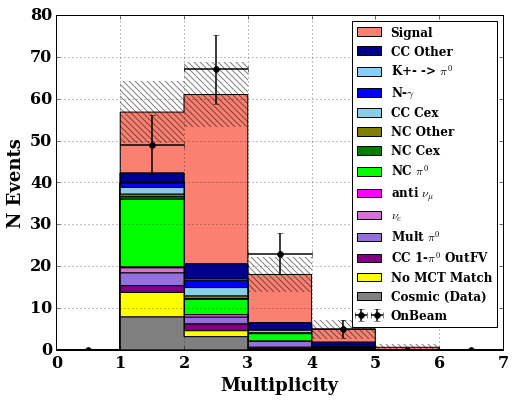

In [95]:
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Multiplicity')

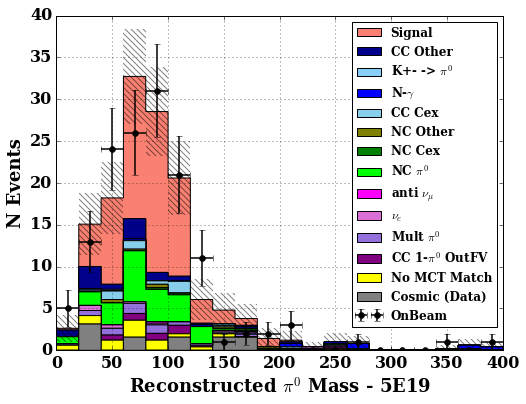

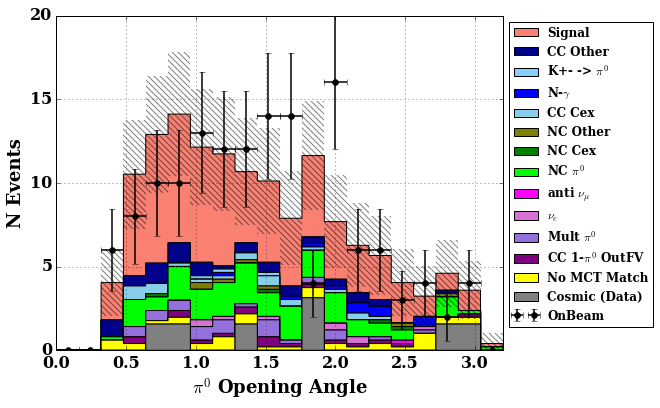

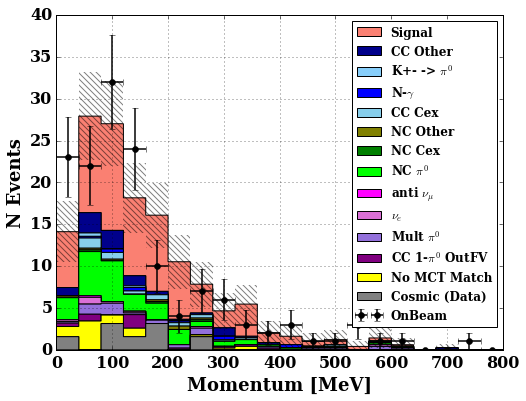

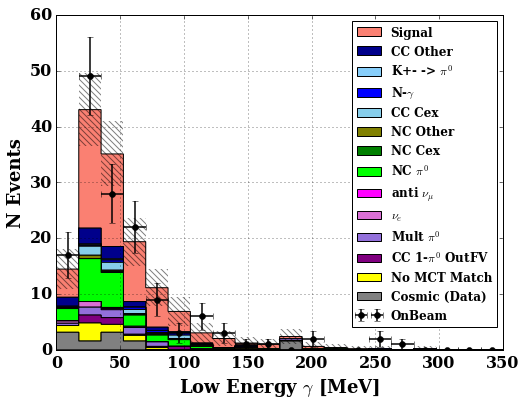

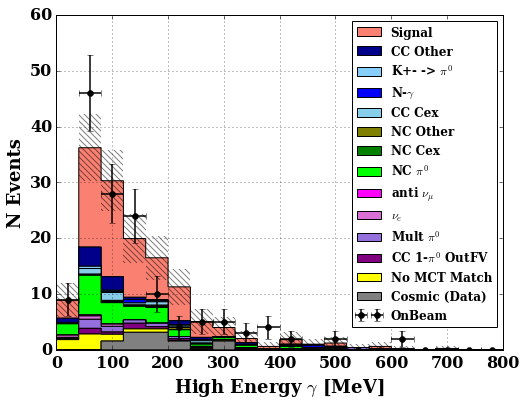

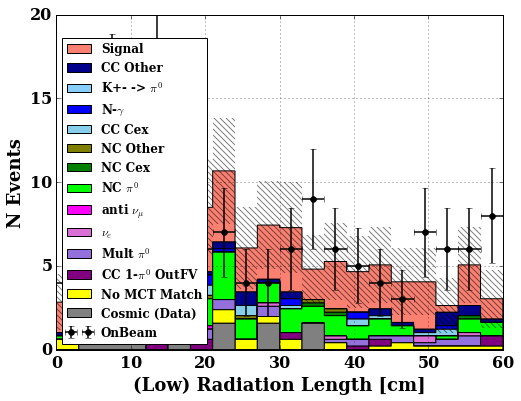

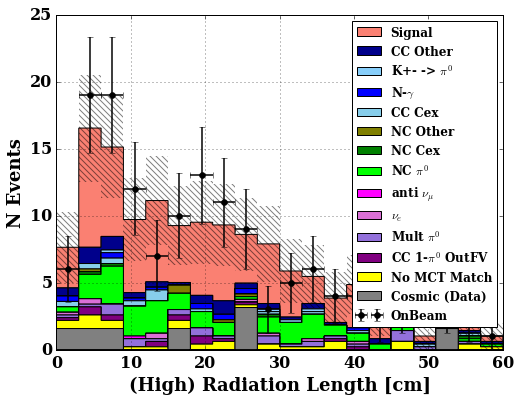

In [96]:
makeOnOffPlots('pi0_mass',0,400,xlabel='Reconstructed $\pi^0$ Mass - 5E19')
makeOnOffPlots('pi0_oangle',0,3.2,xlabel='$\pi^0$ Opening Angle')
makeOnOffPlots('pi0_mom',0,800,xlabel='Momentum [MeV]')
makeOnOffPlots('pi0_low_shrE',0,350,xlabel='Low Energy $\\gamma$ [MeV]')
makeOnOffPlots('pi0_high_shrE',0,800,xlabel='High Energy $\\gamma$ [MeV]')
makeOnOffPlots('pi0_low_radL',0,60,xlabel='(Low) Radiation Length [cm]')
makeOnOffPlots('pi0_high_radL',0,60,xlabel='(High) Radiation Length [cm]')

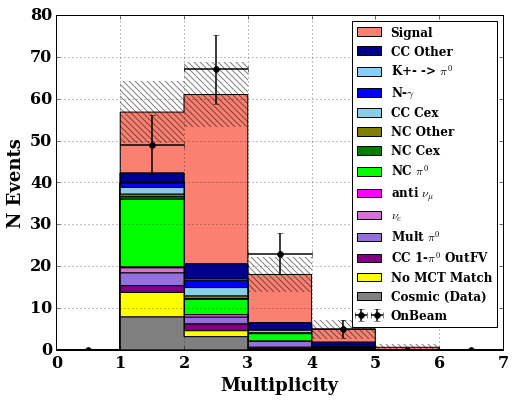

In [97]:
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Multiplicity')

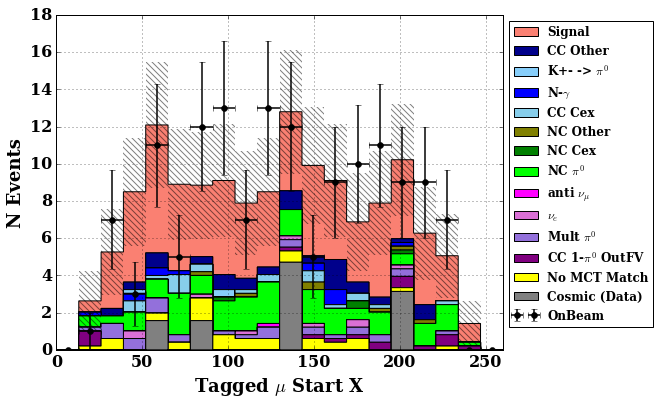

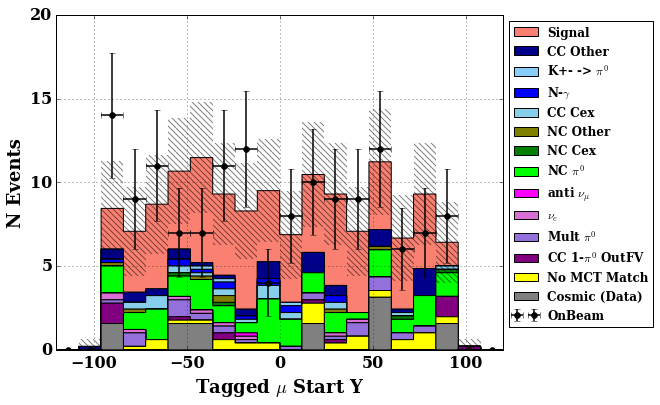

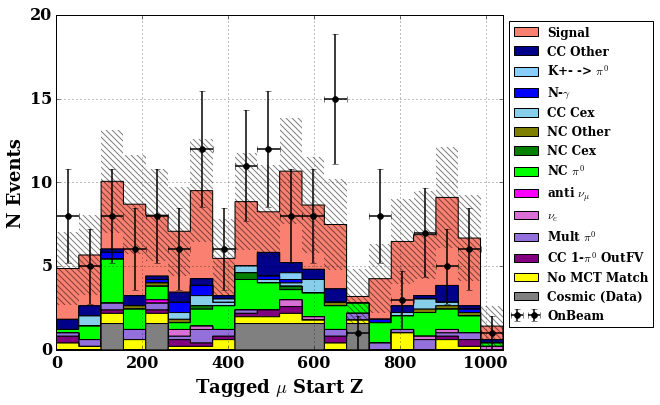

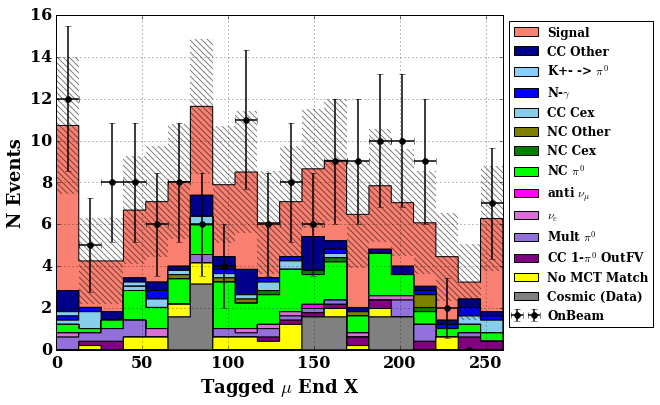

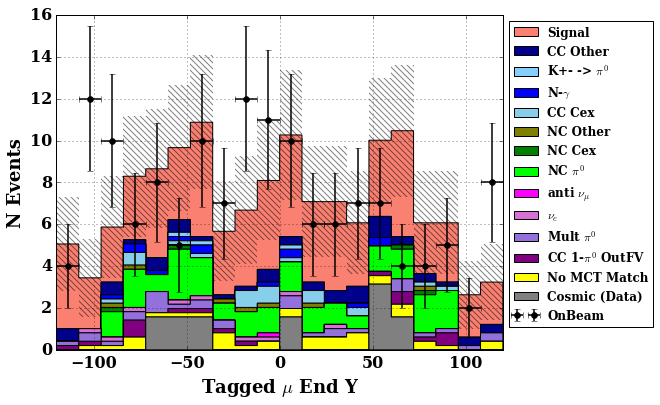

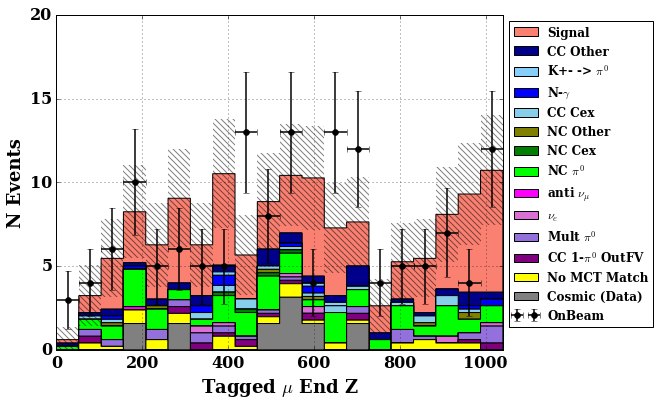

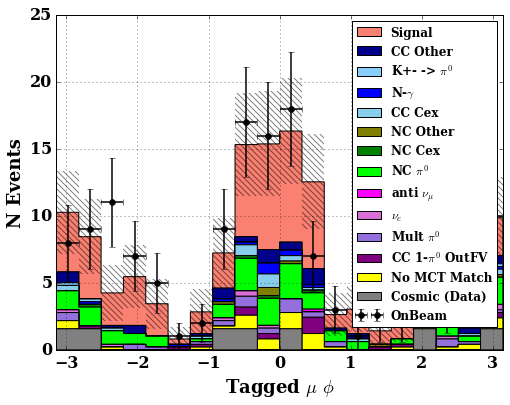

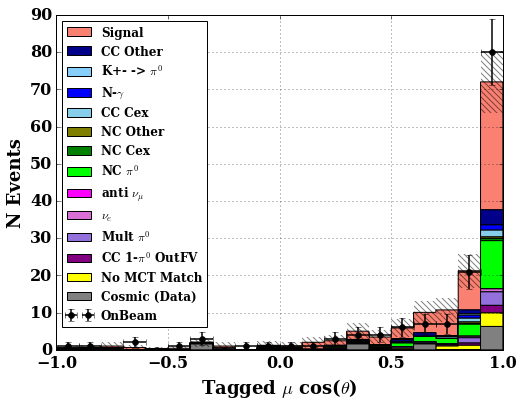

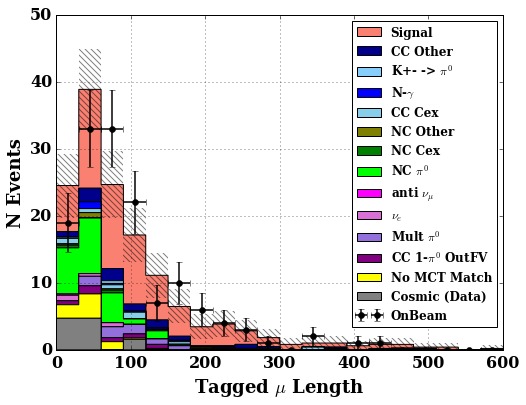

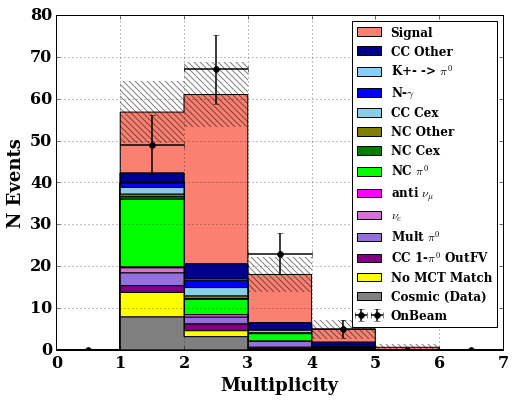

In [98]:
makeOnOffPlots('mu_startx',0,260,xlabel='Tagged $\mu$ Start X')
makeOnOffPlots('mu_starty',-120,120,xlabel='Tagged $\mu$ Start Y')
makeOnOffPlots('mu_startz',0,1040,xlabel='Tagged $\mu$ Start Z')
makeOnOffPlots('mu_endx',0,260,xlabel='Tagged $\mu$ End X')
makeOnOffPlots('mu_endy',-120,120,xlabel='Tagged $\mu$ End Y')
makeOnOffPlots('mu_endz',0,1040,xlabel='Tagged $\mu$ End Z')

makeOnOffPlots('mu_phi',-3.14,3.14,xlabel='Tagged $\mu$ $\\phi$')
makeOnOffPlots('mu_angle',-1,1,xlabel='Tagged $\mu$ cos($\\theta$)')
makeOnOffPlots('mu_len',0,600,xlabel='Tagged $\mu$ Length')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Multiplicity')

In [41]:
def makePlots(var,xmin,xmax,nbins=20,xlabel=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_min_on_m = x_on - x_off*off_to_on

    off_min_on_m = [off_min_on_m[i] if off_min_on_m[i] >=0 else 0 for i in xrange(len(off_min_on_m)) ]

    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off)
    err_data = np.sqrt(err_on * err_on + err_off * err_off)
    err_mc = np.sqrt(bnbcos_m)
    
    plt.figure()
    fig,ax = plt.subplots(figsize=(8,6))
#     ax.hist([oth_v[var].values,nc1pi0_v[var].values,cc1pi0_outFV_v[var].values,\
#         multpi0_v[var].values,nue_v[var].values,antinumu_v[var].values,cccex_v[var].values,\
#         nccex_v[var].values,ccgamma_v[var].values,kaon_v[var].values,ccoth_v[var].values,\
#              ncoth_v[var].values,cc1pi0_v[var].values],bins=nbins,\
#         label=labels_tst,color=colors_tst,stacked=True,\
#         range=(xmin,xmax),weights=weights[:],rwidth=bin_width,histtype='stepfilled')
    ax.hist([oth_v[var].values,nc1pi0_v[var].values,cc1pi0_outFV_v[var].values,\
        multpi0_v[var].values,nue_v[var].values,antinumu_v[var].values,cccex_v[var].values,\
        nccex_v[var].values,ccgamma_v[var].values,kaon_v[var].values,ccoth_v[var].values,\
        ncoth_v[var].values],bins=nbins,label=labels_tst[:-1],color=colors_tst[:-1],stacked=True,\
        range=(xmin,xmax),weights=weights[:-1],rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc*2,width=bin_width,bottom = bnbcos_m - err_mc,\
        alpha=.5,color='r',linewidth=0,label='Monte Carlo')
    #plt.bar(bins - bin_width/2,err_mc*2,width=bin_width,bottom = bnbcos_m - err_mc,\
    #    alpha=.8,  fill=False, linewidth=0,hatch='\\\\\\')#,label='Monte Carlo')
    plt.errorbar(bins,off_min_on_m,xerr=bin_width/2,yerr=err_data,fmt='ko',label='On - OffBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var == 'mu_startx' or var == 'mu_starty' or var == 'mu_startz' or \
       var == 'mu_endx' or var == 'mu_endy' or var == 'mu_endz' or \
       var == 'vtx_x' or var == 'vtx_y' or var == 'vtx_z' or var == 'pi0_oangle':
        print 'lol' #plt.legend(handles=handles[::-1],fontsize=12,loc='upper left',bbox_to_anchor=(1,0.7))
    else:
        plt.legend(handles=handles[::-1],fontsize=12,loc=0) #,loc='upper left',bbox_to_anchor=(1,0.9))
    
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('N Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.savefig('Plots/Physics_%s_%s.png'%(stage,var))

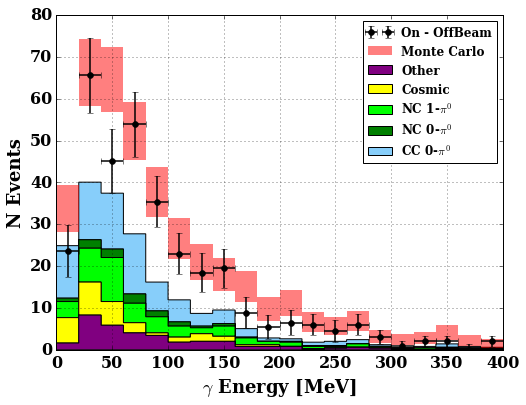

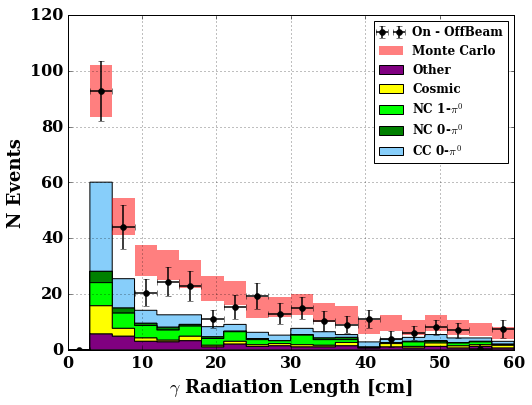

In [35]:
#Single Shower plots

makePlots('gamma_E',0,400,xlabel='$\\gamma$ Energy [MeV]')
makePlots('gamma_RL',0,60,xlabel='$\\gamma$ Radiation Length [cm]')


In [15]:
df0['pi0_low_shrE_corr'] = df0['pi0_low_shrE'] / 0.77
df1['pi0_low_shrE_corr'] = df1['pi0_low_shrE'] / 0.77
df['pi0_low_shrE_corr'] = df['pi0_low_shrE'] / 0.77
df0['pi0_high_shrE_corr'] = df0['pi0_high_shrE'] / 0.77
df1['pi0_high_shrE_corr'] = df1['pi0_high_shrE'] / 0.77
df['pi0_high_shrE_corr'] = df['pi0_high_shrE'] / 0.77

df0['pi0_mass_corr'] = np.sqrt( 2 * df0['pi0_low_shrE_corr'] * df0['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df0['pi0_oangle'])))
df1['pi0_mass_corr'] = np.sqrt( 2 * df1['pi0_low_shrE_corr'] * df1['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df1['pi0_oangle'])))
df['pi0_mass_corr'] = np.sqrt( 2 * df['pi0_low_shrE_corr'] * df['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df['pi0_oangle'])))

cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

#print cos_v.shape[0] + nc_v.shape[0] + mult_v.shape[0] + sig_v.shape[0] + ccoth_v.shape[0] + test_v.shape[0]

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

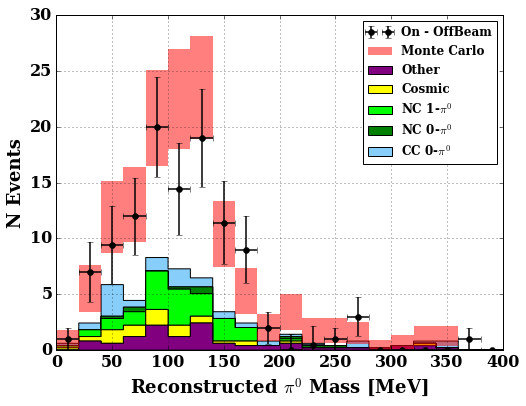

In [23]:
makePlots('pi0_mass_corr',0,400,xlabel='Reconstructed $\pi^0$ Mass [MeV]')